In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Acquisition

In [2]:
chem = pd.read_csv('solubility_data.csv')

In [3]:
data = chem.copy()

### Exploratory Data Analysis

1. ID: A key showing which molecules came from what data set (A-I) and their number from the dataset.
2. Name: IUPAC name of chemical, i.e., the molecule's name in standardized nomenclature.
3. InChl: International Chemical Identifier, for showing chemical information.
4. InChlKey: Key for the Internation Chemical Identifier for deciphering the InChl.
5. SMILES: Line notation for displaying chemical structure in ASCII format.
6. Solubility: The log aqueous solubility of the molecule ( 0 to -2: soluble, -2 to -4: slightly soluble, less than -4: insoluble).
7. SD: standard deviation of log aqueous solubility.
8. Occurrence: Number of times the molecule appeared in the nine datasets.
9. Group: Separation of molecules into groups based on occurrence, mean of the solubility, and/or accuracy to the reference solubility (see Sorkun et al. 2019 for more details).
10. MolWt: Molecular weight of the molecule in g/mol.
11. MolLogP: Octanal-water partition coefficient.
12. MolMR: Molar refractivity of the molecule.
13. HeavyAtomCount: The number of heavy atoms (atoms that are not hydrogen)
14. NumHAcceptors: Number of hydrogen acceptors present.
15. NumHDonors: Number of hydrogen donors.
16. NumHeteroatoms: Number of atoms that are not hydrogen or carbon.
17. NumRotatableBonds: The number of bonds present that can undergo a rotation.
18. NumValenceElectrons: The total number of valence electrons present in the molecule.
19. NumAromaticRings: The number of aromatic rings present in the molecule.
20. NumSaturatedRings: The number of rings composed of only single bonds.
21. NumAliphaticRings: The number of non-aromatic rings present.
22. RingCount: The total number of rings present in the molecule.
23. TPSA: The topological polar surface area, i.e., the sum of the surface area filled by polar atoms.
24. LabuteASA: The surface area accessible by a solvent (in this case, water).
25. Balabanj: Balaban’s J index describes the molecular accessibility of the chemical.
26. BertzCT: A measure of the complexity of bonding and distribution of heteroatoms.


In [4]:
#Checking the data was imported correctly
data.shape

(9982, 26)

In [5]:
#Obtaining sense of data
data.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [6]:
#For this machine learning task, the ID, Name, InChl, InChlKey, and SMILES variables have no relevance and are only identifiers
data = data.drop(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES'], axis = 1)

#SD, Ocurrences, and Group also has no relevance for predicting solubility, rather they refer to how the literature value was sourced
data = data.drop(['SD', 'Ocurrences', 'Group'], axis = 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Solubility           9982 non-null   float64
 1   MolWt                9982 non-null   float64
 2   MolLogP              9982 non-null   float64
 3   MolMR                9982 non-null   float64
 4   HeavyAtomCount       9982 non-null   float64
 5   NumHAcceptors        9982 non-null   float64
 6   NumHDonors           9982 non-null   float64
 7   NumHeteroatoms       9982 non-null   float64
 8   NumRotatableBonds    9982 non-null   float64
 9   NumValenceElectrons  9982 non-null   float64
 10  NumAromaticRings     9982 non-null   float64
 11  NumSaturatedRings    9982 non-null   float64
 12  NumAliphaticRings    9982 non-null   float64
 13  RingCount            9982 non-null   float64
 14  TPSA                 9982 non-null   float64
 15  LabuteASA            9982 non-null   f

All the features are of numeric type. Additionally there appears to be no Null values, this will be investigated briefly.

In [8]:
data.describe()

,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,-2.889909,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,467.336782
std,2.368154,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,546.631696
min,-13.171900,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000
25%,-4.326325,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,163.243343
50%,-2.618173,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,351.640433
75%,-1.209735,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848
max,2.137682,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708


To illustrate the distribution of chemicals, a histogram of the MolWt variable will be used. The Molar weight of a molecule is related to several other variables such as HeavyAtomCount, and NumValenceElectrons. Therefore, MolWt will be used as it is representative of several variables and will give a good understanding of the variability of molecules

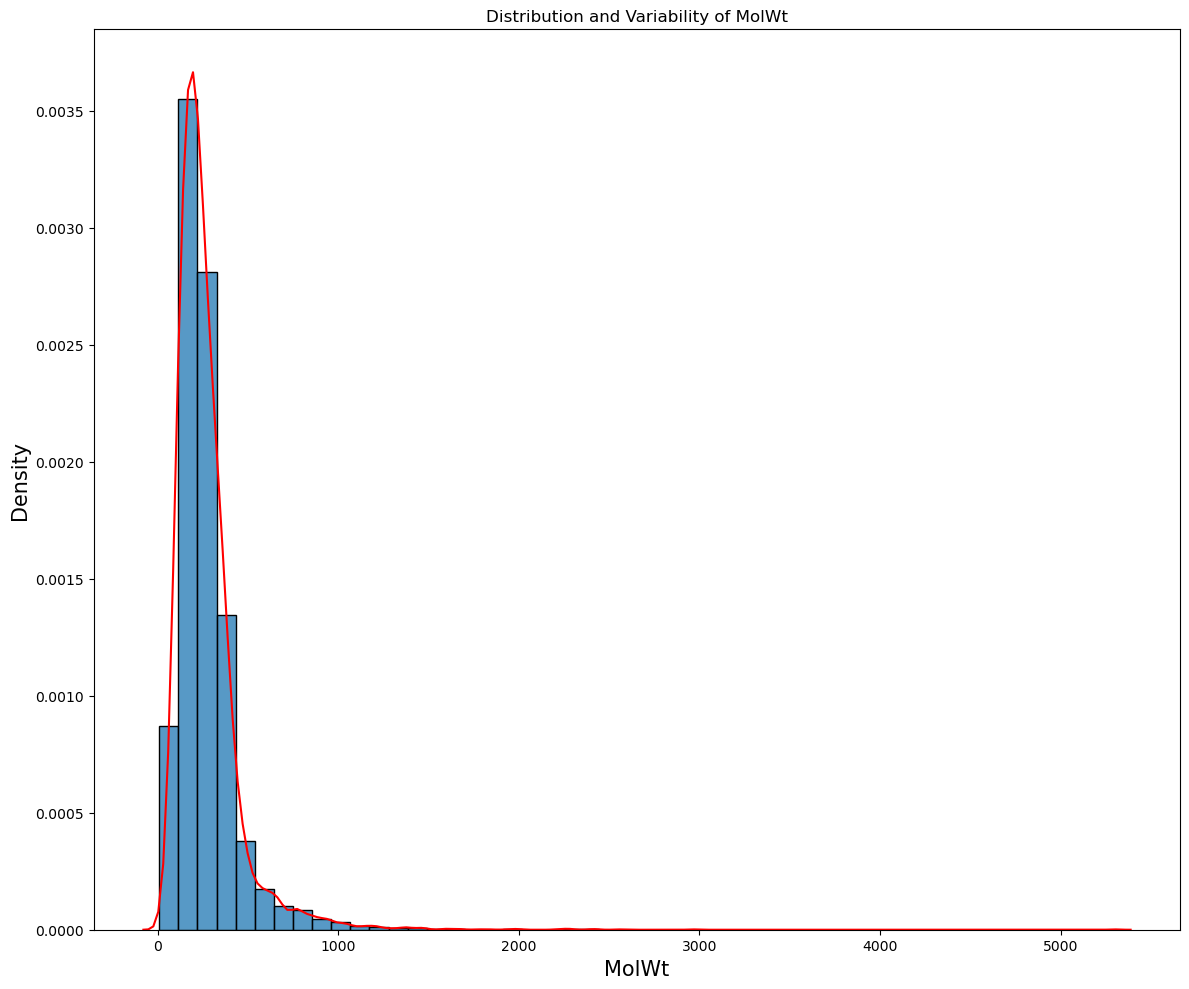

In [9]:
#Creating a histogram to observe the distribution and variability of the data
plt.figure(figsize = (12,10))
hist = sns.histplot(data = data['MolWt'], bins = 50, stat = 'density')
sns.kdeplot(data = data, x = 'MolWt', color = 'red', ax = hist)
plt.ylabel('Density', fontsize = 15)
plt.xlabel('MolWt', fontsize = 15)
plt.title('Distribution and Variability of MolWt')
plt.tight_layout()
plt.show()

As seen in the above histogram, the majority of the molecules in the data have a molar weight between 0 - 1000 g/mol. This makes sense as only complex molecules, such as polymers, or molecules with multiple heavy atoms would have a weight above 1000 g/mol.

A minimum value of 0 for MolMR, TPSA, BalabanJ, and BertzCT is fairly uncommon/may indicate a null value. To validate the data, observations with ~0 for the previously listed variables will be re-calculated utilizing rdkit

In [10]:
#Importing necessary libraries to validate 0 values
import rdkit
from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Descriptors
from rdkit.Chem import GraphDescriptors

In [11]:
#Identifying observations with 0 in TPSA and BalabanJ
chem.loc[chem['TPSA'] == 0, ['Name', 'SMILES', 'MolMR', 'TPSA', 'BalabanJ', 'BertzCT']].head()

,Name,SMILES,MolMR,TPSA,BalabanJ,BertzCT
0,"N,N,N-trimethyloctadecan-1-aminium bromide",[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,102.4454,0.0,0.000000,210.377334
5,vinyltoluene,Cc1cccc(C=C)c1,41.2700,0.0,3.070761,211.033225
18,1-chloro-3-(trifluoromethyl)benzene,FC(F)(F)c1cccc(Cl)c1,36.4540,0.0,3.059902,254.107753
21,1-methyl-4-(propan-2-ylidene)cyclohex-1-ene,CC(C)=C1CCC(=CC1)C,45.9820,0.0,2.668730,178.214991
26,"2,4-dichloro-1-(chloromethyl)benzene",ClCc1ccc(Cl)cc1Cl,46.0190,0.0,3.069983,232.292870


In [12]:
#Verifying TPSA and BalabanJ values of 0 are not indicative of Nulls
trimethylocta = Chem.MolFromSmiles(chem.iloc[0]['SMILES'])
print('TPSA: ', Descriptors.TPSA(trimethylocta), 'BalabanJ: ', GraphDescriptors.BalabanJ(trimethylocta))

TPSA:  0.0 BalabanJ:  0


In [13]:
#Identifying observations with 0 in MolMR and BertzCT
chem.loc[chem['BertzCT'] == 0, ['Name', 'SMILES', 'MolMR', 'TPSA', 'BalabanJ', 'BertzCT']].head()

,Name,SMILES,MolMR,TPSA,BalabanJ,BertzCT
38,molybdenum,[Mo],0.000,0.0,0.0,0.0
143,magnesium,[Mg++],5.754,0.0,0.0,0.0
199,cadmium,[Cd++],0.000,0.0,0.0,0.0
296,RHENIUM,[Re],0.000,0.0,0.0,0.0
310,ethane,CC,11.348,0.0,1.0,0.0


In [14]:
#Verifying MolMR and BertzCT values of 0 are not indicative of Nulls
molyb = Chem.MolFromSmiles(chem.iloc[38]['SMILES'])
print('MolMR: ', Crippen.MolMR(molyb), 'BertzCT: ', GraphDescriptors.BertzCT(molyb))

MolMR:  0.0 BertzCT:  0


Based on the .info() data and validation that a 0 value is not Null for the 2D descriptors, there are no Nulls in the data (i.e. the data semi-cleaned by the authors of the academic papers where the data was sourced).

### Data Exploration/Feature Selection and Data Preparation/Cleaning

In [15]:
from sklearn.model_selection import train_test_split


#Splitting the data into training and test set before feature selection
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

The target variable will be removed from the train_set and test_set after data exploration, for ease of graphing and to help prevent data leakage.

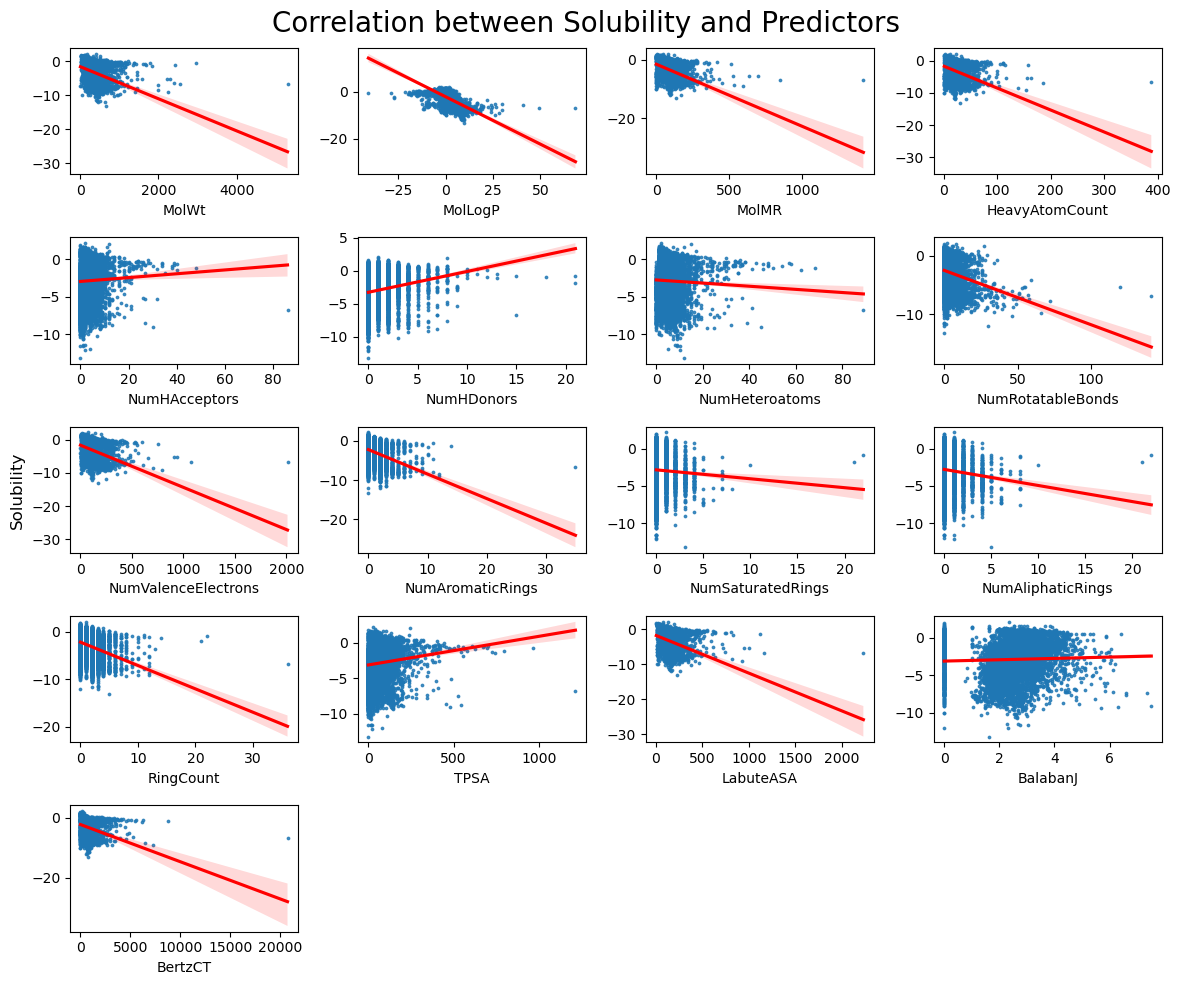

In [16]:
#Creating variable list to loop through for regression plots
predictors = [['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount'], ['NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds'],
             ['NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings'], ['RingCount', 'TPSA', 'LabuteASA',
             'BalabanJ'], ['BertzCT']]

#Separating independent and dependant variables
X_graph = train_set.drop(['Solubility'], axis = 1)
y_graph = train_set['Solubility']

fig, axs = plt.subplots(ncols = 4, nrows = 5, figsize = (12, 10))
b = 0
for l in predictors:
    a = 0
    for i in l:
        plot = sns.regplot(x = X_graph[i], y = y_graph, ax = axs[b,a], scatter_kws = {'s':3}, line_kws = {'color':'red'})
        plot.set(ylabel = None)
        plt.tight_layout()
        a += 1
    b += 1

fig.supylabel('Solubility')
fig.suptitle('Correlation between Solubility and Predictors', fontsize = 20)

fig.delaxes(axs[4][1])
fig.delaxes(axs[4][2])
fig.delaxes(axs[4][3])

plt.tight_layout()
plt.show()

Based on the regression plots above, it appears that many predictors lack significant correlation with the target variable solubility (ex. BalabanJ and NumHAcceptors). Numeric correlation values will be obtained below and utilized in the feature selection process.

In [17]:
train_set.corr()['Solubility'].sort_values(ascending = False)

Solubility             1.000000
NumHDonors             0.192767
TPSA                   0.106968
BalabanJ               0.040893
NumHAcceptors          0.037527
NumHeteroatoms        -0.041166
NumSaturatedRings     -0.041514
NumAliphaticRings     -0.091912
NumRotatableBonds     -0.222551
BertzCT               -0.287713
RingCount             -0.335921
NumAromaticRings      -0.343989
NumValenceElectrons   -0.346380
LabuteASA             -0.349797
HeavyAtomCount        -0.352441
MolWt                 -0.367409
MolMR                 -0.421327
MolLogP               -0.600633
Name: Solubility, dtype: float64

Based on the correlation values above, several features appear to be poor predictors of solubility. The poorest predictors of solubility -- based on correlation -- are TPSA, BalabanJ, NumHAcceptors, NumSaturatedRings, and NumAliphaticRings. A correlation threshold of 0.15 will be used to determine which features to drop. The low threshold will prevent too many features from being dropped, which may lead to underfitting, while still dropping some features thus lowering the computational cost of the final model.

In [18]:
#Function to drop all features below the correlation threshold
def corr_drop(df, corr_threshold):
    corr_value = abs(df.corr()['Solubility'])
    corr_list = corr_value[corr_value <= corr_threshold].index.tolist()
    df = df.drop(columns = corr_list)
    return df, corr_list

In [19]:
#Removing features below correlation threshold of 0.15
train_set_reduced, dropped_features = corr_drop(train_set, 0.15)
test_set_reduced = test_set.drop(dropped_features, axis = 1)

<Axes: >

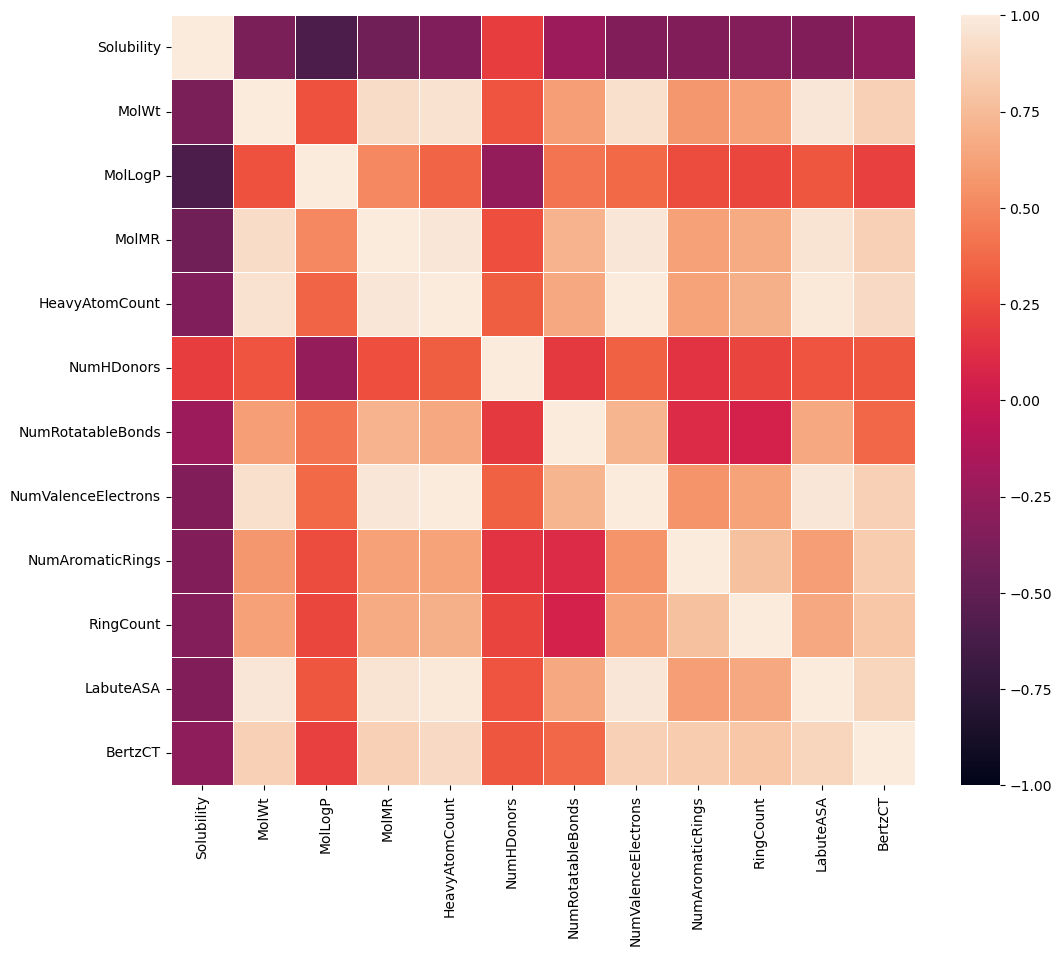

In [20]:
data_corr = train_set_reduced.corr()

fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data_corr, linewidth = 0.4, vmin = -1.0)

Based on the heatmap above, several features appear to have a high correlation with each other. Thus, multicollinearity may pose an issue for the machine learning model. To further investigate the multicollinearity of the independent variables, the variance inflation factor will be used

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train_set_reduced1 = train_set_reduced.drop(['Solubility'], axis = 1)
test_set_reduced1 = test_set_reduced.drop(['Solubility'], axis = 1)

vif = pd.DataFrame(data = train_set_reduced1.columns, columns = ['variable'])
vif['vif'] = [variance_inflation_factor(train_set_reduced1.values, i) for i in range(len(train_set_reduced1.columns))]

In [22]:
#To further reduce the variance inflation factor, the data will be scaled using a standard scaler
from sklearn.preprocessing import StandardScaler

#Removing target variable before scaling
y_train = train_set_reduced['Solubility']
y_test = test_set_reduced['Solubility']

scale = StandardScaler()

scale.fit(train_set_reduced1)
train_set_scaled = train_set_reduced1.copy()
train_set_scaled.values[:] = scale.fit_transform(train_set_reduced1)

vif['vif_scaled'] = [variance_inflation_factor(train_set_scaled.values, i) for i in range(len(train_set_scaled.columns))]
vif

,variable,vif,vif_scaled
0,MolWt,75.715935,24.791090
1,MolLogP,6.732854,5.165847
2,MolMR,241.844640,80.829657
3,HeavyAtomCount,2194.699782,761.250036
4,NumHDonors,2.612081,1.681954
5,NumRotatableBonds,8.106456,7.297107
6,NumValenceElectrons,1480.577582,481.387317
7,NumAromaticRings,9.975784,7.007300
8,RingCount,11.419320,6.442335
9,LabuteASA,307.652852,102.681599


In [23]:
#Based on the vif, HeavyAtomCount and NumValenceElectrons will be dropped to try and prevent multicollinearity/redundancy

train_set_scaled = train_set_scaled.drop(['HeavyAtomCount', 'NumValenceElectrons'], axis = 1)

#Scaling the test data and dropping the selected features
test_set_scaled = test_set_reduced1.copy()
test_set_scaled.values[:] = scale.transform(test_set_reduced1)
test_set_scaled = test_set_scaled.drop(['HeavyAtomCount', 'NumValenceElectrons'], axis = 1)

### Model Selection/Training

In [24]:
#Separating target variable in training and test set
X_train = train_set_scaled
X_test = test_set_scaled


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

#Evaluating the default RandomForestRegressor model
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)
rfr_rmse = -cross_val_score(rfr, X_train, y_train, cv = 3, scoring = 'neg_root_mean_squared_error').mean()
rfr_r2 = -cross_val_score(rfr, X_train, y_train, cv = 3, scoring = 'r2').mean()

#Evaluating the default GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(X_train, y_train)
gbr_rmse = -cross_val_score(gbr, X_train, y_train, cv = 3, scoring = 'neg_root_mean_squared_error').mean()
gbr_r2 = -cross_val_score(gbr, X_train, y_train, cv = 3, scoring = 'r2').mean()


print('rfr_rmse: ', rfr_rmse, 'rfr_R2: ', rfr_r2, 'gbr_rmse: ', gbr_rmse, 'gbr_R2: ', gbr_r2)

rfr_rmse:  1.2346294843076018 rfr_R2:  -0.7302867613509137 gbr_rmse:  1.2614307362798705 gbr_R2:  -0.7184036074166672


Both the default RandomForest and GradientBoosting models had a similar rmse score, and R2, as well as trained fairly quickly. Therefore, a simple grid search will be conducted to try and further narrow down the best model to pursue.

In [26]:
from sklearn.model_selection import GridSearchCV
#Conducting grid search
param_grid = {'max_depth': [1, 3, 5],
             'n_estimators': [50, 100, 200],
             'learning_rate': [0.001, 0.01, 0.1, 0.25]}

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state = 42),
                          param_grid, verbose = 1, cv = 3)
grid_search_gbr.fit(X_train, y_train)
optimal_gbr = GradientBoostingRegressor(**grid_search_gbr.best_params_, random_state = 42)
print('best parameters: ', grid_search_gbr.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [27]:
print('best parameters: ', grid_search_gbr.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [28]:
#Obtaining RMSE score for evaluation
optimal_gbr.fit(X_train, y_train),
gbr_opt_rmse = -cross_val_score(optimal_gbr, X_train, y_train, cv = 3, scoring = 'neg_root_mean_squared_error').mean()

In [29]:
param_grid = {'max_depth': [1, 4, 16],
             'n_estimators': [50, 100, 200],
             'min_samples_split': [2, 4, 12]}

grid_search_rfr = GridSearchCV(RandomForestRegressor(random_state = 42),
                              param_grid, verbose = 1, cv = 3)

grid_search_rfr.fit(X_train, y_train)
optimal_rfr = RandomForestRegressor(**grid_search_rfr.best_params_, random_state = 42)
print('best parameters: ', grid_search_rfr.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
best parameters:  {'max_depth': 16, 'min_samples_split': 4, 'n_estimators': 200}


In [30]:
optimal_rfr.fit(X_train, y_train),
rfr_opt_rmse = -cross_val_score(optimal_rfr, X_train, y_train, cv = 3, scoring = 'neg_root_mean_squared_error').mean()

In [31]:
print('opt_rfr_rmse: ', rfr_opt_rmse, 'opt_gbr_rmse: ', gbr_opt_rmse)

opt_rfr_rmse:  1.231484863926043 opt_gbr_rmse:  1.2478321418176497


As like before, the rmse of the RandomForestRegressor indicated better performance for the data. Therefore, further hyperparameter searches will be conducted on the RandomForestRegressor model.

In [32]:
print('best parameters: ', grid_search_rfr.best_params_)

best parameters:  {'max_depth': 16, 'min_samples_split': 4, 'n_estimators': 200}


In [33]:
from sklearn.model_selection import RandomizedSearchCV

#Due to the large quanity of data, RandomizedSearchCV is used
param_grid = {'max_depth': [12, 16, 20, 26, 32],
             'n_estimators': [175, 200, 400, 800, 1000],
             'min_samples_split': [2, 3]}

grid_search_rfr2 = RandomizedSearchCV(RandomForestRegressor(random_state = 42),
                                     param_grid, verbose = 1, cv = 3, n_iter = 20)

grid_search_rfr2.fit(X_train, y_train)
optimal_rfr2 = RandomForestRegressor(**grid_search_rfr2.best_params_, random_state = 42)
print('best parameters: ', grid_search_rfr2.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
best parameters:  {'n_estimators': 1000, 'min_samples_split': 3, 'max_depth': 32}


In [34]:
param_grid = {'max_depth': [28, 32, 36, 40, 44],
             'n_estimators': [900, 1000, 1250, 1500],
             'min_samples_split': [2, 3]}

grid_search_rfr3 = RandomizedSearchCV(RandomForestRegressor(random_state = 42),
                                     param_grid, verbose = 1, cv = 3, n_iter = 20)

grid_search_rfr3.fit(X_train, y_train)
optimal_rfr3 = RandomForestRegressor(**grid_search_rfr3.best_params_, random_state = 42)
print('best parameters: ', grid_search_rfr3.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
best parameters:  {'n_estimators': 1500, 'min_samples_split': 2, 'max_depth': 40}


In [35]:

param_grid = {'max_depth': [38, 40, 42],
             'n_estimators': [1400, 1500, 1750, 2000],
             'min_samples_split': [2, 3]}

grid_search_rfr4 = RandomizedSearchCV(RandomForestRegressor(random_state = 42),
                                     param_grid, verbose = 1, cv = 3, n_iter = 15)

grid_search_rfr4.fit(X_train, y_train)
optimal_rfr4 = RandomForestRegressor(**grid_search_rfr4.best_params_, random_state = 42)
print('best parameters: ', grid_search_rfr4.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
best parameters:  {'n_estimators': 2000, 'min_samples_split': 2, 'max_depth': 42}


The n_estimators could be tuned further, however, anymore would most likely see diminishing returns not worth the training time.

In [36]:
optimal_rfr4.fit(X_train, y_train)
rfr4_opt_rmse = -cross_val_score(optimal_rfr4, X_train, y_train, cv = 3, scoring = 'neg_root_mean_squared_error').mean()
print('rfr4_rmse: ', rfr4_opt_rmse)

rfr4_rmse:  1.2292263534457697


The RMSE score has improved slightly with hyperparameter optimization. However, a neural network will be tried to see if one can obtain better results

In [37]:
#%pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
import keras_tuner

#Creadting function that makes a neural network model for use in hyperparameter optimization
def create_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape = (9,)))
    
    #Hyperparameters to be searched
    act = hp.Choice('activation', ['relu', 'elu'])
    layer1 = hp.Int('layer1', min_value = 1, max_value = 200, step = 20)
    layer2 = hp.Int('layer2', min_value = 1, max_value = 200, step = 20)
    layer3 = hp.Int('layer3', min_value = 1, max_value = 200, step = 20)
    
    #Adding layers to the model
    model.add(keras.layers.Dense(units = layer1, activation = act))
    model.add(keras.layers.Dense(units = layer2, activation = act))
    model.add(keras.layers.Dense(units = layer3, activation = act))
    
    #Additional hyperparameters to be searched
    lr = hp.Choice('learning', values = [1e-1, 1e-2, 1e-3, 1e-4])
    
    model.compile(loss = keras.losses.MeanSquaredError,
                 optimizer = keras.optimizers.Adam(learning_rate = lr),
                 metrics = ['root_mean_squared_error'])
    return model

In [38]:
#Creating tuner instance to search hyperparameters
tuner = keras_tuner.Hyperband(create_model,
                              max_epochs = 100,
                              objective = 'val_loss',
                              factor = 4,
                              directory = 'directory',
                              project_name = 'tuning',
                              max_consecutive_failed_trials = 10
                             )

Reloading Tuner from directory\tuning\tuner0.json


In [39]:
#Early stopping instance
early_stopping = keras.callbacks.EarlyStopping(patience = 10, monitor = 'val_loss')

In [40]:
#Searching for best hyperparameters
tuner.search(X_train, y_train, epochs = 40, validation_split = 0.2, callbacks = [early_stopping])

In [41]:
#Obtaining best hyperparameters from search
best_model = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [42]:
#Fitting the final tuned model
final_model = tuner.hypermodel.build(best_model)
history = final_model.fit(X_train, y_train, epochs = 100,)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 10.0750 - root_mean_squared_error: 3.1698  
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 9.0505 - root_mean_squared_error: 3.0076
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 9.1932 - root_mean_squared_error: 3.0318
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 9.1121 - root_mean_squared_error: 3.0185
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 9.0663 - root_mean_squared_error: 3.0106
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 9.3187 - root_mean_squared_error: 3.0522
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 9.3378 - root_mean_squared_error: 3.0554
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 9.2827 - root_mean_squared_error: 3.0463
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 9.0601 - root_mean_squared_error: 3.0098
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss:

Epoch 60/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 9.2360 - root_mean_squared_error: 3.0384
Epoch 61/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 8.9837 - root_mean_squared_error: 2.9965
Epoch 62/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 9.0608 - root_mean_squared_error: 3.0098
Epoch 63/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 9.0912 - root_mean_squared_error: 3.0148
Epoch 64/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 9.0557 - root_mean_squared_error: 3.0087
Epoch 65/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 9.2064 - root_mean_squared_error: 3.0333
Epoch 66/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 9.1690 - root_mean_squared_error: 3.0277
Epoch 67/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 9.2225 - root_mean_squared_error: 3.0366
Epoch 68/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 9.2699 - root_mean_squared_error: 3.0441
Epoch 69/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step

In [43]:
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 161)            │         1,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 181)            │        29,322 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 121)            │        22,022 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,864 (620.57 KB)

 Trainable params: 52,954 (206.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,910 (413.71 KB)

In [44]:
#Evaluating the RMSE of the best epoch
neural_df = pd.DataFrame(history.history)
neural_df['root_mean_squared_error'].min()

3.0336453914642334

### Revisiting Features
The features manually selected in the above model are fairly easy to obtain utilizing software. However, to see if less features or a better model can be constructed, we will conduct further manual feature elimination followed by recursive feature elimination and compare the results to those above.

In [45]:
#Viewing correlation of previous training set
train_set_scaled2 = train_set_scaled.copy()
train_set_scaled2['Solubility'] = train_set_reduced['Solubility']
test_set_scaled2 = test_set_scaled.copy()
test_set_scaled2['Solubility'] = test_set_reduced['Solubility']
train_set_scaled2.corr()['Solubility'].sort_values(ascending = False)

Solubility           1.000000
NumHDonors           0.192767
NumRotatableBonds   -0.222551
BertzCT             -0.287713
RingCount           -0.335921
NumAromaticRings    -0.343989
LabuteASA           -0.349797
MolWt               -0.367409
MolMR               -0.421327
MolLogP             -0.600633
Name: Solubility, dtype: float64

In [46]:
#Viewing vif of previous training set
vif2 = pd.DataFrame(data = train_set_scaled2.columns, columns = ['variable'])
vif2['vif'] = [variance_inflation_factor(train_set_scaled2.values, i) for i in range(len(train_set_scaled2.columns))]
vif2

,variable,vif
0,MolWt,21.304715
1,MolLogP,5.225917
2,MolMR,58.321323
3,NumHDonors,1.611281
4,NumRotatableBonds,6.592749
5,NumAromaticRings,5.128030
6,RingCount,5.648473
7,LabuteASA,75.898835
8,BertzCT,18.713669
9,Solubility,1.251515


In [47]:
#Based on the high vif value and mediocre correlation, LabuteASA will be dropped and the rmse will be calculated
#test_set_scaled2 = test_set_scaled.copy()
#train_set_scaled2 = train_set_scaled.copy()

train_set_scaled2 = train_set_scaled2.drop(['LabuteASA'], axis = 1)
test_set_scaled2 = test_set_scaled2.drop(['LabuteASA'], axis = 1)

X_train3 = train_set_scaled2.drop(['Solubility'], axis = 1)
y_train3 = train_set_scaled2['Solubility']

X_test3 = test_set_scaled2.drop(['Solubility'], axis = 1)
y_test3 = test_set_scaled2['Solubility']

random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(X_train3, y_train3)

random_forest_rmse = -cross_val_score(random_forest, X_train3, y_train3, cv = 3, scoring = 'neg_root_mean_squared_error').mean()

print('rfr_w/o_labute RMSE: ', random_forest_rmse, 'rfr_w/_labute RMSE', rfr_rmse)

rfr_w/o_labute RMSE:  1.2393173395433246 rfr_w/_labute RMSE 1.2346294843076018


In [48]:
#Testing the optimized RandomForestRegressor model with and without labuteASA
random_forest2 = RandomForestRegressor(random_state = 42, n_estimators = 2000, min_samples_split = 2, max_depth = 42)
random_forest2.fit(X_train3, y_train3)

random_forest_rmse2 = -cross_val_score(random_forest2, X_train3, y_train3, cv = 3, scoring = 'neg_root_mean_squared_error').mean()

print('rfr_w/o_labute RMSE: ', random_forest_rmse2, 'rfr_w/_labute RMSE', rfr4_opt_rmse)

rfr_w/o_labute RMSE:  1.2330446631039336 rfr_w/_labute RMSE 1.2292263534457697


The removal of the feature LabuteASA appeared to have a detrimental effect on the default random forest model, based on RMSE. Next, we will remove the feature with the lowest correlation.

In [49]:
#Based on the low correlation, NumHDonors will be dropped and the rmse will be calculated
train_set_scaled2 = train_set_scaled.copy()
train_set_scaled2['Solubility'] = train_set_reduced['Solubility']
test_set_scaled2 = test_set_scaled.copy()
test_set_scaled2['Solubility'] = test_set_reduced['Solubility']

train_set_scaled2 = train_set_scaled2.drop(['NumHDonors'], axis = 1)
test_set_scaled2 = test_set_scaled2.drop(['NumHDonors'], axis = 1)

X_train3 = train_set_scaled2.drop(['Solubility'], axis = 1)
y_train3 = train_set_scaled2['Solubility']

X_test3 = test_set_scaled2.drop(['Solubility'], axis = 1)
y_test3 = test_set_scaled2['Solubility']

random_forest2 = RandomForestRegressor(random_state = 42)
random_forest2.fit(X_train3, y_train3)

random_forest_rmse = -cross_val_score(random_forest2, X_train3, y_train3, cv = 3, scoring = 'neg_root_mean_squared_error').mean()

print('rfr_w/o_NumH RMSE: ', random_forest_rmse, 'rfr_w/_NumH RMSE', rfr_rmse)

rfr_w/o_NumH RMSE:  1.2443272223533783 rfr_w/_NumH RMSE 1.2346294843076018


As with the removal of LabuteASA, the removal of NumHDonors also had a deleterious effect on RMSE of the default random forest model.

In [50]:
#Creating another train and test set to conduct feature selection on
X = data.drop(['Solubility'], axis = 1)
y = data['Solubility']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
#Scaling the features to be used in recursive feature elimination
scale2 = StandardScaler()
scale2.fit(X_train2)
X_train2.values[:] = scale2.fit_transform(X_train2)
X_test2.values[:] = scale2.transform(X_test2)

In [52]:
#Feature selection using recursive feature elimination
from sklearn.feature_selection import RFE


feature_tree = RandomForestRegressor(random_state = 42)
recursivefe = RFE(estimator = feature_tree, n_features_to_select = 9)
recursivefe.fit(X_train2, y_train2)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=9)

In [53]:
#Unscaling and rescaling X_sets, to allow for input data scaling later w/ selected features
X_train2.values[:] = scale2.inverse_transform(X_train2)
X_test2.values[:] = scale2.inverse_transform(X_test2)

In [54]:
#Dropping columns selected by RFE
X_train2_rfe = recursivefe.transform(X_train2)
X_test2_rfe = recursivefe.transform(X_test2)
X_train2.columns[(recursivefe.get_support())]

Index(['MolWt', 'MolLogP', 'MolMR', 'NumHeteroatoms', 'NumRotatableBonds',
       'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT'],
      dtype='object')

In [55]:
#Creating final scaler to use and import to flask directory
final_scale = StandardScaler()

final_scale.fit(X_train2_rfe)
X_train2_rfe = final_scale.fit_transform(X_train2_rfe)
X_test2_rfe = final_scale.transform(X_test2_rfe)

In [56]:
#Viewing RMSE of training data with RFE features removed
rand_for = RandomForestRegressor(n_estimators= 2000, min_samples_split= 2, max_depth= 42, random_state= 42)
rand_for.fit(X_train2_rfe, y_train2)
-cross_val_score(rand_for, X_train2_rfe, y_train2, cv = 3, scoring = 'neg_root_mean_squared_error').mean()

1.1815972817681588

The recursive feature elimination process resulted in a RandomForestRegressor model with a slightly lower RMSE then the RandomForestRegressor model trained on the manually selected features. Therefore, the final model will be subsequently tested, utilizing the features chosen by RFE.

The RandomForestRegressor will now be tried on the test set to see the generalization error and if any over/underfitting has occured.

In [57]:
#Calculating rmse on the test set
gen_error_rfr = -cross_val_score(rand_for, X_test2_rfe, y_test2, cv = 3, scoring = 'neg_root_mean_squared_error').mean()

print('RandomForestRegressor RMSE: ', gen_error_rfr)

RandomForestRegressor RMSE:  1.248442670601765


The generalization error of the RandomForestRegressor is similar to that of the training set, indicating that no significant over/underfitting has occured. The RMSE of 1.2484 indicates that the aqueous solubility of a molecule can be accurately predicted 95% of the time within 2.4968 units.

### Future Direction
Based on the results of recursive feature elimination as well as the removal of the feature with the highest vif, and feature with the lowest correlation; it is unlikely that the models will improve immensely due to futher feature selection. For future attempts at predicting aqueous solubility, one may recommend obtaining the data of more chemicals as well as testing/adding other possibly relevant features related to solubility, such as melting and boiling point.

In [58]:
data2 = chem.copy()
data2 = data2['SD']

train_sd, test_sc = train_test_split(data2, test_size = 0.2, random_state = 42)

In [59]:
#Testing the current best model
model_predictions = rand_for.predict(X_test2_rfe[:10])
actual_solubility = y_test2[:10]
Results_df = pd.DataFrame(data = {'Prediction': model_predictions, 'Actual': actual_solubility, 'SD': test_sc[:10]})
Results_df

,Prediction,Actual,SD
1253,-4.078025,-5.984242,0.000000
9930,-3.754603,-4.160000,0.158641
7046,-3.566235,-2.283900,0.000000
8711,-4.110700,-4.230000,0.000000
6880,-0.311001,0.552600,0.000000
1056,-2.022307,-2.153178,0.295489
35,-4.157014,-4.793228,0.000000
9682,-2.432089,-2.390000,0.065135
2168,-1.051698,0.166535,0.000000
6952,-1.518077,-1.496900,0.042011


### Exporting Model for UI

In [61]:
#Exporting model to Pickle File
import joblib
joblib.dump(rand_for, 'final_chem_model.pkl', compress=1)


['final_chem_model.pkl']

In [ ]:
#Exporting scaler
joblib.dump(final_scale, 'std_scaler.pkl', compress = 1)

In [65]:
#Testing the pkl file
data_test = pd.DataFrame({'MolWt': [140.75], 'MolLogP': [1.0337], 'MolMR': [28.6335], 'NumHeteroatoms': [5],
                    'NumRotatableBonds': [3], 'TPSA': [44.76], 'LabuteASA': [48.359382], 'Balabanj': [3.79101],
                    'BertzCT': [82.436995]})
data_test = final_scale.transform(data_test)
file = open('final_chem_model.pkl', 'rb')

trained_model = joblib.load(file)

prediction = trained_model.predict(data_test)
prediction

D:\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([-0.31064007])